# # Logistic Regression

Logistic regression is a machine learning algorithm that build on the linear regression by introducing non-linearity in the form a sigmoid function to it. Essentially speaking the output of a linear regressor which can be described as a linear combination of features and parameters is fed to a sigmoid function and the a probability measure is calculated. The non-linearity introduced in the form of sigmoid function helps in learning non-linear decision boundaries and ouput of the sigmoid serves as a measure of the probability of a class. In this implementation I have used an iterative gradient based algorithm, known as the gradient descent in order to optimize the parameters of the sigmoid function in order to learn the most optimal decsision boundary on the basis  of the given data. I have specifically used cross-entropy to calculate the loss between the predicted output and the actual output and tried to minimize that loss by using a variant of gradient descent known as stochastic gradient descent which minimizes the loss over a random datapoint from the training data in each epoch to learn the most optimal parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
from random import randrange

In [2]:
class LogisticRegression:
    def __init__(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.weights = np.random.random_sample(size = X_train.shape[1])
        self.bias = np.random.random_sample(size = 1)
        self.threshold = math.pow(10,-8)
    
    def predict(self,x):
        return 1/(1+math.exp(-1*(np.matmul(self.weights, x.T)+self.bias)))
    
    def evaluate(self,x):
        if 1/(1+math.exp(-1*(np.matmul(self.weights, x.T)+self.bias)))>0.5:
            return 1
        else:
            return 0
        
    def cost(self, y_pred, y_actual):
        cost = y_actual*(math.log(y_pred,10))+(1-y_actual)*(math.log((1-y_pred),10))
        return cost
    
    def train(self, n_epochs, learning_rate):
        past_cost = 0
        prsent_cost = 0
        for i in range(n_epochs):
            res = (self.X_train.shape[0])
            random_datapoint = random.randint(0,res-1)
            y_pred = self.predict(self.X_train[random_datapoint,:])
            y_actual = self.Y_train[random_datapoint]
            present_cost = self.cost(y_pred = y_pred, y_actual = y_actual)
            if abs(present_cost - past_cost) > self.threshold:
                for j in range(len(self.weights)):
                    self.weights[j] = self.weights[j] - learning_rate*((self.predict(self.X_train[random_datapoint,:])-self.Y_train[random_datapoint])*(self.X_train[random_datapoint,j]))
                self.bias = self.bias - learning_rate*(self.predict(self.X_train[random_datapoint,:])-self.Y_train[random_datapoint])
                past_cost = present_cost
            else:
                break

In [670]:
data = pd.read_csv("blobs250.csv")

In [671]:
Y = data.loc[:,["Class"]]

In [672]:
X = data.loc[:, ['X0', 'X1', 'X2']]

In [673]:
X = X.values

In [674]:
Y = Y.values

# Data split

I have used my own data split function written using numpy and not used scikitlearn's implementation. This splits the data in 85-15-15 ratio for training-test-validation sets.

In [8]:
def data_split(X,Y):
    indices = np.random.choice(range(X.shape[0]), int(0.85*X.shape[0]), replace=False)
    indices_validation = np.random.choice(indices, size=int(0.15*X.shape[0]), replace = False)
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    X_valid = []
    Y_valid = []
    for i in range(len(X)):
        if i in indices_validation:
            X_valid.append(X[i])
            Y_valid.append(Y[i])
        elif i in indices and i not in indices_validation:
            X_train.append(X[i])
            Y_train.append(Y[i])
        else:
            X_test.append(X[i])
            Y_test.append(Y[i])
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    X_valid = np.array(X_valid)
    Y_valid = np.array(Y_valid)
    return X_train, Y_train, X_test, Y_test, X_valid, Y_valid


In [675]:
X_train, Y_train, X_test, Y_test, X_valid, Y_valid = data_split(X,Y)

In [10]:
obj = LogisticRegression(X_train,Y_train)

In [11]:
obj.train(n_epochs = 50, learning_rate = 0.01)

In [12]:
valid_error = 0
for i in range(len(X_valid)):
    res = obj.evaluate(X_valid[i])
    valid_error = valid_error + abs(res-np.asscalar(Y_valid[i]))

<ipython-input-12-47d486ab2c70>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  valid_error = valid_error + abs(res-np.asscalar(Y_valid[i]))


In [13]:
valid_error

0

In [14]:
test_error = 0
for i in range(len(X_test)):
    res = obj.evaluate(X_test[i])
    test_error = test_error + abs(res-np.asscalar(Y_test[i]))

<ipython-input-14-0c5557611724>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  test_error = test_error + abs(res-np.asscalar(Y_test[i]))


In [15]:
test_error

0

In the cells above the logistic regression algorithm was used for learning a classifier on the blobs250 dataset. The training data consisted of 175 samples, the test data was made up of 38 samples and 37 samples made up the validation data. The model was trained for 50 epochs using a learning rate of 0.01 and the model was able to achieve a 100% accuracy score on test and validation sets. Thus, logistiic regression was able to find the perfect fit for this dataset. I observed that the model required few epochs and could get excellent results with a high learning rate, and from this observation I conclude that the decision boundary is approximately linear in nature and therefore fitting it is easier.

In [679]:
data = pd.read_csv("moons400(1).csv")

In [680]:
Y = data.loc[:,["Class"]]

In [681]:
X = data.loc[:, ['X0', 'X1']]

In [682]:
X = X.values

In [683]:
Y = Y.values

In [684]:
X_train, Y_train, X_test, Y_test, X_valid, Y_valid = data_split(X,Y)

In [687]:
X_valid.shape

(60, 2)

In [686]:
X_test.shape

(60, 2)

In [685]:
X_train.shape

(280, 2)

In [22]:
obj = LogisticRegression(X_train,Y_train)

In [23]:
obj.train(n_epochs = 1000, learning_rate = 0.09)

In [24]:
valid_error = 0
for i in range(len(X_valid)):
    res = obj.evaluate(X_valid[i])
    valid_error = valid_error + abs(res-np.asscalar(Y_valid[i]))

<ipython-input-24-47d486ab2c70>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  valid_error = valid_error + abs(res-np.asscalar(Y_valid[i]))


In [25]:
valid_error

5

In [26]:
test_error = 0
for i in range(len(X_test)):
    res = obj.evaluate(X_test[i])
    test_error = test_error + abs(res-np.asscalar(Y_test[i]))

<ipython-input-26-0c5557611724>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  test_error = test_error + abs(res-np.asscalar(Y_test[i]))


In [27]:
test_error

6

In the cells above the logistic regression algorithm was used for learning a classifier on the blobs250 dataset. The training data consisted of 280 samples, the test data was made up of 60 samples and 60 samples made up the validation data. The validation set was used to optimize the hyperparameter and the number of epochs for which this model is to be trained. It was found that when the model was trained for 1000 epochs using a learning rate of 0.09 then model was able to achieve the best performance with 90% accuracy score on test and approximately 92% on the validation set. The higher number of epochs show that the decision boundary is more difficult and possibly non-linear in nature.

## Shallow NN

Neural network follows from the connectionist approach to computing. In neural networks multiple neurons are connected each by weighted connections. It can essentially be thought of as a graph with directed weighted edges. Taking this this approach, the logistic regression algorithm used above can also be thought of as a graph with the output node connected to all the input nodes where each input node represents a afeature of the input vector. The essential difference is that in a neural network the inputs are not directly connected to the output but instead to other nodes which essentially transform the features by applying a linear transformation with a weights followed by non-linearities, the outputs generated by these intermediate nodes are subseque ntly connected to other intermediate nodes by weighted connections and this goes on till the last intermediate layer which then serves as an input to the output layer with a transformed set of features. The main idea behind this approach is that the features transformed withhin these layers successively capture more important information about the data and thus can enable learning of better decsion boundaries or regressions at the output node. The weights are learned by using an iterative algorithm known as gradient descnet which minimzes the loss or the difference between actual and predicted values as a function of the weights iteratively. I have used stochastic gradient descent in my approach which optimizes the loss over a specific datapoint chosen randomly in each iteration.

The algorithm supports multiple hidden layers with two types of activation: sigmoid and Relu and multiple nodes in each layer.

In [573]:
class NN:
    ##Intilialization Constructor
    def __init__(self, X_train, Y_train, n_hidden_layers, hidden_layers_neurons, n_inputs,activation):
        if n_hidden_layers == 0:
            raise Exception("Sorry, there has to be atleast two layers (one input layer and one hidden layer) in the network")
        elif n_hidden_layers >= 1:
            activations = []
            z_values = []
            weights = []
            dl_weights = []
            dl_biases = []
            dl_z_values = []
            dl_activations = []
            output_weights = []
            biases = []
            for i in range(len(hidden_layers_neurons)):
                activations.append(np.random.random_sample(size = (hidden_layers_neurons[i],1)))
                z_values.append(np.random.random_sample(size = (hidden_layers_neurons[i],1)))
                biases.append(np.random.random_sample(size = (hidden_layers_neurons[i],1)))
                dl_activations.append(np.random.random_sample(size = (hidden_layers_neurons[i],1)))
                dl_z_values.append(np.random.random_sample(size = (hidden_layers_neurons[i],1)))
                dl_biases.append(np.random.random_sample(size = (hidden_layers_neurons[i],1)))
                if i == 0:
                    weights.append(np.random.random_sample(size = (hidden_layers_neurons[i],n_inputs))/1000)
                    dl_weights.append(np.random.random_sample(size = (hidden_layers_neurons[i],n_inputs))/1000)
                else:
                    weights.append(np.random.random_sample(size = (hidden_layers_neurons[i],hidden_layers_neurons[i-1])))
                    dl_weights.append(np.random.random_sample(size = (hidden_layers_neurons[i],hidden_layers_neurons[i-1])))
            ##Values
            self.output_weights_nn = np.random.random_sample(size = (1,hidden_layers_neurons[n_hidden_layers-1]))
            self.output_hidden_nn = np.random.random_sample(size = (1,1))
            self.output_bias_nn = np.random.random_sample(size = (1,1))
            self.output_activation_nn = np.random.random_sample(size = (1,1))
            self.weights_nn = weights
            self.biases_nn = biases
            self.z_values_nn = z_values
            self.activations_nn = activations
            self.X_train = X_train
            self.Y_train = Y_train
            self.neurons_per_hidden_layer_nn = hidden_layers_neurons
            self.number_of_hidden_layers_nn = n_hidden_layers
            self.n_inputs_nn = n_inputs
            ##Derivatives
            self.dl_output_weights_nn = np.random.random_sample(size = (1,hidden_layers_neurons[n_hidden_layers-1]))
            self.dl_output_hidden_nn = np.random.random_sample(size = (1,1))
            self.dl_output_bias_nn = np.random.random_sample(size = (1,1))
            self.dl_output_activation_nn = np.random.random_sample(size = (1,1))
            self.dl_weights_nn = dl_weights
            self.dl_biases_nn = dl_biases
            self.dl_z_values_nn = dl_z_values
            self.dl_activations_nn = dl_activations
            self.activation_type = activation
            
    ##The output node, it uses sigmoid to give binary probabilities
    def output(self,res):
        if res < 0:
            return 1 - 1 / (1 + np.exp(res))
        return 1 / (1 + np.exp(-res))
        
    ##Activation Function
    def sigmoid(self,res):
        if self.activation_type == "sigmoid":
            if res < 0:
                return 1 - 1 / (1 + np.exp(res))
            return 1 / (1 + np.exp(-res))
        elif self.activation_type == "relu":
            if res>6:
                res = 6
            y1 = ((res > 0) * res)                                                 
            y2 = ((res <= 0) * res * 0.01)                                         
            return y1 + y2  

            
    ##Derivative of activation function        
    def sigmoid_derivative(self,res):
        if self.activation_type == "sigmoid":
            return self.sigmoid(res)*(1-self.sigmoid(res))
        elif self.activation_type == "relu":
            if res < 0:
                return 0.01
            else:
                return 1
            
    ##Forward Propagation Function        
    def forward(self,X):
        dim = X.shape[0]
        X = X.reshape(1,dim)
        hidden_state = X
        for i in range(self.number_of_hidden_layers_nn):
            hidden_state = np.matmul(hidden_state,self.weights_nn[i].T) + self.biases_nn[i].T
            self.z_values_nn[i] = hidden_state.T
            self.activations_nn[i] = np.array([self.sigmoid(xi) for xi in hidden_state[0]]).reshape(1,self.neurons_per_hidden_layer_nn[i]).T
            hidden_state = self.activations_nn[i].T
        self.output_hidden_nn = np.dot(self.output_weights_nn,self.activations_nn[self.number_of_hidden_layers_nn-1]) + self.output_bias_nn
        self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))
        return self.output_activation_nn
     
    ##Backpropagation Function    
    def backward(self,Y,X,learning_rate):
        dim = X.shape[0]
        X = X.reshape(1,dim)
        ##Derivatives of last layer
        self.dl_output_hidden_nn = self.output_activation_nn - Y
        self.dl_output_weights_nn = self.output_hidden_nn * (self.activations_nn[self.number_of_hidden_layers_nn-1].T)
        self.dl_output_bias_nn = self.dl_output_hidden_nn
        self.output_weights_nn = self.output_weights_nn - (learning_rate*self.dl_output_weights_nn)
        self.output_bias_nn =  self.output_bias_nn - (learning_rate*self.dl_output_bias_nn)
        self.output_hidden_nn = self.output_hidden_nn - (learning_rate*self.dl_output_hidden_nn)
        
        ##Looping back through the hidden layers, with conditions essentially checking how many layers are present
        for i in range(self.number_of_hidden_layers_nn-1,-1,-1):
            
            ## last Hidden layer with hidden layer to the left
            if i == self.number_of_hidden_layers_nn-1 and i != 0:
                res = self.z_values_nn[i].reshape(1,self.neurons_per_hidden_layer_nn[i])
                res = res[0]
                res = np.array([self.sigmoid_derivative(xi) for xi in res])
                for j in range(self.neurons_per_hidden_layer_nn[self.number_of_hidden_layers_nn-1]):
                    sum1 = 0
                    sum1 = sum1 + self.dl_output_hidden_nn*self.output_weights_nn[0,j]
                    res[j] = res[j]*sum1
                res = np.array(res).reshape(self.neurons_per_hidden_layer_nn[i],1)
                
                ##Derivative wrt hidden state
                self.dl_z_values_nn[self.number_of_hidden_layers_nn-1] = res
                
                ##Derivative wrt biases
                self.dl_biases_nn[self.number_of_hidden_layers_nn-1] = res
                
                ##Derivative wrt weights
                self.dl_weights_nn[i] = np.matmul(self.dl_z_values_nn[self.number_of_hidden_layers_nn-1],self.activations_nn[i-1].T)
                
                ##Updates using learning rate
                self.z_values_nn[i] = self.z_values_nn[i]-(learning_rate*self.dl_z_values_nn[i])
                self.biases_nn[i] = self.biases_nn[i]-(learning_rate*self.dl_biases_nn[i])
                self.weights_nn[i] = self.weights_nn[i]-(learning_rate*self.dl_weights_nn[i])
            
            ## Last hidden layer with input on the left
            elif i == self.number_of_hidden_layers_nn-1 and i == 0:
                res = self.z_values_nn[i].reshape(1,self.neurons_per_hidden_layer_nn[i])
                res = res[0]
                res = np.array([self.sigmoid_derivative(xi) for xi in res])
                for j in range(self.neurons_per_hidden_layer_nn[self.number_of_hidden_layers_nn-1]):
                    sum1 = 0
                    sum1 = sum1 + self.dl_output_hidden_nn*self.output_weights_nn[0,j]
                    res[j] = res[j]*sum1
                res = np.array(res).reshape(self.neurons_per_hidden_layer_nn[i],1)
                self.dl_z_values_nn[self.number_of_hidden_layers_nn-1] = res
                self.dl_biases_nn[self.number_of_hidden_layers_nn-1] = res
                self.dl_weights_nn[i] = np.matmul(self.dl_z_values_nn[self.number_of_hidden_layers_nn-1],X)
                self.z_values_nn[i] = self.z_values_nn[i]-(learning_rate*self.dl_z_values_nn[i])
                self.biases_nn[i] = self.biases_nn[i]-(learning_rate*self.dl_biases_nn[i])
                self.weights_nn[i] = self.weights_nn[i]-(learning_rate*self.dl_weights_nn[i])
            
            ## Middle hidden layer with input to the left
            elif i < self.number_of_hidden_layers_nn-1 and i == 0:
                res = self.z_values_nn[i].reshape(1,self.neurons_per_hidden_layer_nn[i])
                res = res[0]
                res = np.array([self.sigmoid_derivative(xi) for xi in res])
                weights = self.weights_nn[i+1]
                hidden = self.z_values_nn[i+1]
                hidden = hidden.T
                hidden = hidden[0]
                weights = weights.T
                for j in range(len(weights)):
                    intermediate = np.dot(hidden,weights[j])
                    res[j] = res[j]*intermediate
                res = np.array(res).reshape(self.neurons_per_hidden_layer_nn[i],1)
                self.dl_z_values_nn[self.number_of_hidden_layers_nn-1] = res
                self.dl_biases_nn[self.number_of_hidden_layers_nn-1] = res
                self.dl_weights_nn[i] = np.matmul(self.dl_z_values_nn[i],X)
                self.z_values_nn[i] = self.z_values_nn[i]-(learning_rate*self.dl_z_values_nn[i])
                self.biases_nn[i] = self.biases_nn[i]-(learning_rate*self.dl_biases_nn[i])
                self.weights_nn[i] = self.weights_nn[i]-(learning_rate*self.dl_weights_nn[i])
            
            ##Middle hidden layer with hidden layer to the left 
            elif i < self.number_of_hidden_layers_nn-1 and i != 0:
                res = self.z_values_nn[i].reshape(1,self.neurons_per_hidden_layer_nn[i])
                res = res[0]
                res = np.array([self.sigmoid_derivative(xi) for xi in res])
                weights = self.weights_nn[i+1]
                hidden = self.z_values_nn[i+1]
                hidden = self.z_values_nn[i+1]
                hidden = hidden.T
                hidden = hidden[0]
                weights = weights.T
                for j in range(len(weights)):
                    intermediate = np.dot(hidden,weights[j])
                    res[j] = res[j]*intermediate
                res = np.array(res).reshape(self.neurons_per_hidden_layer_nn[i],1)
                self.dl_z_values_nn[i] = res
                self.dl_biases_nn[i] = res
                self.dl_weights_nn[i] = np.matmul(self.dl_z_values_nn[i],self.activations_nn[i-1].T)
                self.z_values_nn[i] = self.z_values_nn[i]-(learning_rate*self.dl_z_values_nn[i])
                self.biases_nn[i] = self.biases_nn[i]-(learning_rate*self.dl_biases_nn[i])
                self.weights_nn[i] = self.weights_nn[i]-(learning_rate*self.dl_weights_nn[i])
            
    ##Training function            
    def train(self,learning_rate,n_epochs):
        full_loss = []
        for i in range(n_epochs):
            random_index = randrange(len(self.X_train))
            predicted = self.forward(self.X_train[random_index])
            actual_Y = self.Y_train[random_index]
            loss = -1*(actual_Y*np.log(predicted+0.0000001)+(1-actual_Y)*np.log(1-predicted+0.00000001))
            full_loss.append(loss)
            self.backward(self.Y_train[random_index],self.X_train[random_index],learning_rate)

        x = range(n_epochs)
        plt.plot(x, full_loss)
        plt.savefig('test.png')
        plt.show()
    
    def evaluate(self,X):
        return self.forward(X)
                
                    
                
                

In [580]:
data = pd.read_csv("blobs250.csv")
Y = data.loc[:,["Class"]]
X = data.loc[:, ['X0', 'X1', 'X2']]
Y = Y.values.flatten()
X = X.values

In [581]:
X_train, Y_train, X_test, Y_test, X_valid, Y_valid = data_split(X,Y)

In [582]:
obj = NN(X_train,Y_train,1,[4],3,"sigmoid")

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))


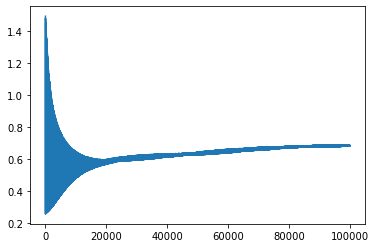

In [583]:
obj.train(0.0001,100000)

Loss Curve

In [584]:
valid_error = 0
for i in range(len(X_valid)):
    res = obj.evaluate(X_valid[i])
    predicted = 0
    if res>0.5:
        predicted = 1
    valid_error = valid_error + abs(predicted - np.asscalar(Y_valid[i]))

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))
<ipython-input-584-7926af1d4fe8>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  valid_error = valid_error + abs(predicted - np.asscalar(Y_valid[i]))


In [585]:
valid_error

0

In [586]:
test_error = 0
for i in range(len(X_test)):
    res = obj.evaluate(X_test[i])
    predicted = 0
    if res>0.5:
        predicted = 1
    test_error = test_error + abs(predicted - np.asscalar(Y_test[i]))

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))
<ipython-input-586-b6a4fcfc7636>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  test_error = test_error + abs(predicted - np.asscalar(Y_test[i]))


In [587]:
test_error

0

The neural network was trained with one hidden layer with 4 neurons for this experiment. It was trained for 100000 epochs with a learning rate of 0.0001 a validation and test accuracy of 100% was achieved. The training data consisted of 175 samples, the test data was made up of 38 samples and 37 samples made up the validation data. The validation set was used to tune in the hyperparameters. This shows that the model was able to learn the decision boundary for blobs250 dataset perfectly. The loss curve shows convergence after a few iterations.This is not unexpected as the neural network can learn non-linear decsion decision boundaries and as hypothesized earlier this is approximately a linear boundary.

In [588]:
data = pd.read_csv("moons400(1).csv")
Y = data.loc[:,["Class"]]
X = data.loc[:, ['X0', 'X1']]
X = X.values
Y = Y.values.flatten()
X_train, Y_train, X_test, Y_test, X_valid, Y_valid = data_split(X,Y)

In [637]:
obj = NN(X_train,Y_train,1,[1],2,"sigmoid")

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))


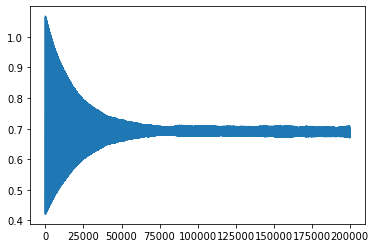

In [638]:
obj.train(0.0001,200000)

Loss Curve

In [639]:
valid_error = 0
for i in range(len(X_valid)):
    res = obj.evaluate(X_valid[i])
    predicted = 0
    if res>0.5:
        predicted = 1
    valid_error = valid_error + abs(predicted - np.asscalar(Y_valid[i]))

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))
<ipython-input-639-7926af1d4fe8>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  valid_error = valid_error + abs(predicted - np.asscalar(Y_valid[i]))


In [640]:
valid_error

11

In [641]:
test_error = 0
for i in range(len(X_test)):
    res = obj.evaluate(X_test[i])
    predicted = 0
    if res>0.5:
        predicted = 1
    test_error = test_error + abs(predicted - np.asscalar(Y_test[i]))

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))
<ipython-input-641-b6a4fcfc7636>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  test_error = test_error + abs(predicted - np.asscalar(Y_test[i]))


In [642]:
test_error

16

On the basis of above experiments when the neural network with one hidden layer was trained for 200000 epochs with a learning rate of 0.0001 a validation accuracy 82% and test accuracy of 74% was achieved. The training data consisted of 280 samples, the test data was made up of 60 samples and 60 samples made up the validation data. The validation set was used to tune in the hyperparameters. The results were lower than that for logistic regression, many attempts were made to further tune the hyperparameters for the given task but this is best accuracy that could be achieved. training for more epochs could possibly be a solution to this problem Furthermore, a convergence around 0.6 was observed for the loss.

## CIFAR-10 

In this experiment I trained my model on 5000 images of cat and truck from the CIFAR-10 dataset. A label of 1 was assigned to truck and a label of 0 was assigned to cat. One hidden with 20 neurons was used for this experiment. The test dataset consisted of 1000 images of cats and trucks and 986 images made up the validation dataset. Each image was turned into a vector of 1024 floats by averaging over the three channels and normalized by 255 to retrict the values to [0,1]. The validation dataset was used to yune the hyperparameters of the model.

In [643]:
import os
import pickle
import numpy as np
from PIL import Image
import tensorflow as tf
import random
import time
from tqdm import tqdm

In [644]:
def unpickle(file):   
    import pickle
    with open(file, 'rb') as fo:       
        dict = pickle.load(fo, encoding='bytes')   
        return dict

In [646]:
directory = "/home/shubhanker/Desktop/Doubts/Deep Learning/cifar-10-python/cifar-10-batches-py/"
for i in range(1, 6):
    file = directory+"data_batch_"+str(i) 
    dict_data = unpickle(file) 
    x_data = dict_data[b'data']  
    y_data = np.array(dict_data[b"labels"])
    if i == 1: 
        x_train = x_data  
        y_train = y_data  
    else:  
        x_train = np.concatenate((x_train, x_data), axis = 0)   
        y_train = np.concatenate((y_train, y_data), axis = 0) 
test_data_file = directory+"test_batch" 
dict_data_test = unpickle(test_data_file)
data = dict_data_test[b"data"]
x_test = data 
y_test = np.array(dict_data_test[b"labels"])

In [647]:
final_x_train = []
final_y_train = []
cat_count = 0
truck_count = 0
for i in range(len(x_train)):
    if cat_count == truck_count and cat_count == 2500:
        break
    elif cat_count<2500 and y_train[i] == 3:
        cat_count+=1
        res = x_train[i].reshape(32,32,3)
        img = np.mean(res, axis=2)
        img = img / 255
        img =  img.flatten()
        final_x_train.append(img)
        final_y_train.append(0)
    elif truck_count<2500 and y_train[i] == 9:
        truck_count+=1
        res = x_train[i].reshape(32,32,3)
        img = np.mean(res, axis=2)
        img = img / 255
        img =  img.flatten()
        final_x_train.append(img)
        final_y_train.append(1)
            
        

In [648]:
final_x_test = []
final_y_test = []
cat_count = 0
truck_count = 0
for i in range(len(x_test)):
    if cat_count == truck_count and cat_count == 500:
        break
    elif cat_count<500 and y_test[i] == 3:
        cat_count+=1
        res = x_test[i].reshape(32,32,3)
        img = np.mean(res, axis=2)
        img = img / 255
        img =  img.flatten()
        final_x_test.append(img)
        final_y_test.append(0)
    elif truck_count<500 and y_test[i] == 9:
        truck_count+=1
        res = x_test[i].reshape(32,32,3)
        img = np.mean(res, axis=2)
        img = img / 255
        img =  img.flatten()
        final_x_test.append(img)
        final_y_test.append(1)
            
        

In [649]:
final_x_valid = []
final_y_valid = []
cat_count = 0
truck_count = 0
for j in range(i,len(x_test)):
    if cat_count == truck_count and cat_count == 500:
        break
    elif cat_count<500 and y_test[j] == 3:
        cat_count+=1
        res = x_test[j].reshape(32,32,3)
        img = np.mean(res, axis=2)
        img = img / 255
        img =  img.flatten()
        final_x_valid.append(img)
        final_y_valid.append(0)
    elif truck_count<500 and y_test[j] == 9:
        truck_count+=1
        res = x_test[j].reshape(32,32,3)
        img = np.mean(res, axis=2)
        img = img / 255
        img =  img.flatten()
        final_x_valid.append(img)
        final_y_valid.append(1)
            
        

In [650]:
final_x_valid = np.array(final_x_valid)
final_y_valid = np.array(final_y_valid)

In [651]:
final_x_train = np.array(final_x_train)
final_y_train = np.array(final_y_train)

In [652]:
final_x_test = np.array(final_x_test)
final_y_test = np.array(final_y_test)

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))


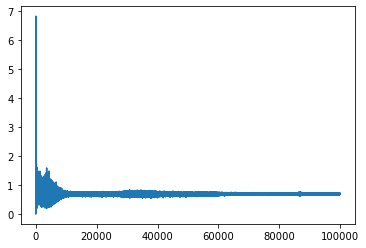

In [653]:
obj = NN(final_x_train,final_y_train,1,[20],1024,"sigmoid")
obj.train(0.001,100000)

Loss curve

In [654]:
valid_error = 0
for i in range(len(final_x_valid)):
    res = obj.evaluate(final_x_valid[i])
    predicted = 0
    if res>0.5:
        predicted = 1
    valid_error = valid_error + abs(predicted - final_y_valid[i])

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))


In [655]:
valid_error

270

In [656]:
test_error = 0
for i in range(len(final_x_test)):
    res = obj.evaluate(final_x_test[i])
    predicted = 0
    if res>0.5:
        predicted = 1
    test_error = test_error + abs(predicted - final_y_test[i])

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))


In [657]:
test_error

278

In [658]:
accuracy =  (len(final_x_test)-test_error)/len(final_x_test)

In [659]:
accuracy

0.722

An experiment was carried out with one hidden layer with 20 layers, the best results that were obtained on validation dataset came from a model that was trained with a learning rate of 0.001 for 100000 epochs. When tested on the test data the model gave a performance of 72.2%. Thus the model was able to perform decently on this task, however the performance is till below the state of the art for CIFAR-10. The loss curve shows a convergence at around 0.8.

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))


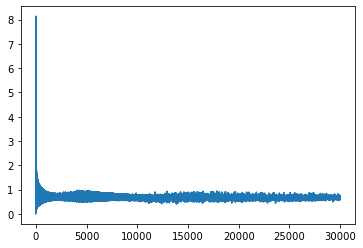

In [660]:
obj = NN(final_x_train,final_y_train,3,[10,3,2],1024,"relu")
obj.train(0.001,30000)

Loss Curve

In [661]:
valid_error = 0
for i in range(len(final_x_valid)):
    res = obj.evaluate(final_x_valid[i])
#     print(res)
    predicted = 0
    if res>0.5:
        predicted = 1
    valid_error = valid_error + abs(predicted - final_y_valid[i])

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))


In [662]:
valid_error

402

In [663]:
test_error = 0
for i in range(len(final_x_test)):
    res = obj.evaluate(final_x_test[i])
    predicted = 0
    if res>0.5:
        predicted = 1
    test_error = test_error + abs(predicted - final_y_test[i])

<ipython-input-573-173b9dbf85d5>:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  self.output_activation_nn = self.output(np.asscalar(self.output_hidden_nn))


In [664]:
test_error

404

As an enhancement, I used the relu activation function, this decision was driven by the fact that sigmoid saturates when handling high dimensional inputs and thus learnability of the model is impacted. Furthermore, I also added multiple layers to the model which led to surprisngly lower accuracy of 60%, thus there was a lower performnace achieved by these layers. experiments not shown here were also carried out with just one hidden layer  and the relu activation function but they did not perform as well as expected with accuracies ranging between 60%-62%. The validation set was used to find the best performing model which was tested on the test data.

## References

All the information, code and concepts used in this assignment was drawn from the lectures. The code was relu implementation was drawn from the pytorch documentation of relu6. This was done because relu was overflowing for multiple layers. The code for reading the CIFAR-10 files was taken from https://medium.com/@rhythm10/image-preprocessing-for-cifar-10-dataset-f2b5cdb221bb